## Data Cleaning and Quality Assurance

Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [43]:
file_path = 'D:\\Work\\Project\\HR\\HRDataset_v14.csv'
hr_data = pd.read_csv(file_path)

In [44]:
hr_data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [45]:
# Check for missing values
missing_values = hr_data.isnull().sum()
print(missing_values)

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [46]:
# Fill missing ManagerID with a placeholder value (-1)
hr_data['ManagerID'].fillna(-1, inplace=True)

# Fill missing DateofTermination with a placeholder value ('N/A')
hr_data['DateofTermination'].fillna(pd.NaT, inplace=True)

# Verify that missing values are handled
missing_values_after = hr_data.isnull().sum()
print("Missing Values After Handling:\n", missing_values_after)

Missing Values After Handling:
 Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       0
RecruitmentSourc

C:\Users\bosst\AppData\Local\Temp\ipykernel_4944\1595023782.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hr_data['ManagerID'].fillna(-1, inplace=True)
C:\Users\bosst\AppData\Local\Temp\ipykernel_4944\1595023782.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [47]:
# Check data types of each column
hr_data.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [48]:
# Convert date columns to datetime
hr_data['DOB'] = pd.to_datetime(hr_data['DOB'])
hr_data['DateofHire'] = pd.to_datetime(hr_data['DateofHire'])
hr_data['DateofTermination'] = hr_data['DateofTermination'].apply(lambda x: pd.to_datetime(x) if x != 'N/A' else x)
hr_data['LastPerformanceReview_Date'] = pd.to_datetime(hr_data['LastPerformanceReview_Date'])

# Verify data types
print("Data Types After Conversion:\n", hr_data.dtypes)


Data Types After Conversion:
 Employee_Name                         object
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                              object
State                                 object
Zip                                    int64
DOB                           datetime64[ns]
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire               

C:\Users\bosst\AppData\Local\Temp\ipykernel_4944\3160932698.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hr_data['DOB'] = pd.to_datetime(hr_data['DOB'])


In [49]:
# Ensure all salaries are positive
hr_data = hr_data[hr_data['Salary'] > 0]

# Verify that all salaries are positive
print("Salary Range After Cleaning:\n", hr_data['Salary'].describe())


Salary Range After Cleaning:
 count       311.000000
mean      69020.684887
std       25156.636930
min       45046.000000
25%       55501.500000
50%       62810.000000
75%       72036.000000
max      250000.000000
Name: Salary, dtype: float64


In [50]:
# Normalize categorical variables
hr_data['Sex'] = hr_data['Sex'].str.capitalize()
hr_data['MaritalDesc'] = hr_data['MaritalDesc'].str.title()
hr_data['RaceDesc'] = hr_data['RaceDesc'].str.title()

# Verify normalization
print("Unique Values in Categorical Columns:\n")
print("Sex:\n", hr_data['Sex'].unique())
print("MaritalDesc:\n", hr_data['MaritalDesc'].unique())
print("RaceDesc:\n", hr_data['RaceDesc'].unique())


Unique Values in Categorical Columns:

Sex:
 ['M ' 'F']
MaritalDesc:
 ['Single' 'Married' 'Divorced' 'Widowed' 'Separated']
RaceDesc:
 ['White' 'Black Or African American' 'Two Or More Races' 'Asian'
 'American Indian Or Alaska Native' 'Hispanic']


In [51]:
# Convert relevant object columns to category
categorical_columns = ['Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore']
for col in categorical_columns:
    hr_data[col] = hr_data[col].astype('category')

In [55]:
# Verify valid DOB values, any date in the future and after hire date is invalid, replace all such values with NaT
hr_data.loc[hr_data['DOB'] > pd.Timestamp.now()] = pd.NaT
hr_data.loc[hr_data['DOB'] > hr_data['DateofHire']] = pd.NaT

# Calculate age of employees
hr_data['Age'] = (pd.Timestamp.now() - hr_data['DOB']).dt.days / 365.25

# Calculate tenure of employees
hr_data['Tenure'] = (pd.Timestamp.now() - hr_data['DateofHire']).dt.days / 365.25

# Verify the derived features
print("Age and Tenure Descriptions:\n", hr_data[['Age', 'Tenure']].describe())

Age and Tenure Descriptions:
               Age      Tenure
count  232.000000  232.000000
mean    41.257830   11.416460
std      4.749821    1.980124
min     31.947981    6.056126
25%     37.318960    9.831622
50%     40.903491   11.058179
75%     45.255989   13.067762
max     50.557153   17.095140


In [56]:
# Ensure Data Consistency
status_map = hr_data[['EmpStatusID', 'EmploymentStatus']].drop_duplicates()
status_map


,EmpStatusID,EmploymentStatus
0,1,Active
1,5,Voluntarily Terminated
8,NaT,NaN
15,4,Terminated for Cause
19,3,Active
39,2,Active
95,1,Terminated for Cause


In [ ]:
# Save cleaned data to a new CSV file
cleaned_file_path = 'D:\\Work\\Project\\HR\\HRDataset_Cleaned.csv'
hr_data.to_csv(cleaned_file_path, index=False)

Exploratory Data Analysis

Compute summary statistics to understand the central tendency, dispersion, and shape of the data distribution.

In [57]:
# Summary statistics for numerical columns
summary_stats = hr_data.describe()
summary_stats

,DOB,DateofHire,DateofTermination,LastPerformanceReview_Date,Age,Tenure
count,232,232,72,232,232.000000,232.000000
mean,1983-04-26 13:51:43.448275840,2013-02-27 03:18:37.241379328,2015-06-25 11:00:00,2017-10-22 17:04:08.275862016,41.257830,11.416460
min,1974-01-07 00:00:00,2007-06-25 00:00:00,2010-08-30 00:00:00,2010-07-14 00:00:00,31.947981,6.056126
25%,1979-04-27 06:00:00,2011-07-05 00:00:00,2013-09-01 18:00:00,2017-02-14 06:00:00,37.318960,9.831622
50%,1983-09-03 00:00:00,2013-07-08 00:00:00,2015-10-12 00:00:00,2019-01-17 12:00:00,40.903491,11.058179
75%,1987-04-04 06:00:00,2014-09-29 00:00:00,2016-09-20 00:00:00,2019-02-07 00:00:00,45.255989,13.067762
max,1992-08-17 00:00:00,2018-07-09 00:00:00,2018-09-27 00:00:00,2019-02-28 00:00:00,50.557153,17.095140
std,NaN,NaN,NaN,NaN,4.749821,1.980124


In [58]:
# Summary statistics for categorical columns
summary_stats_cat = hr_data.describe(include=['category'])
summary_stats_cat

,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore
count,232,232,232,232,232,232,232,232,232,232,232
unique,2,5,3,4,6,17,3,5,21,9,4
top,F,Married,US Citizen,No,White,N/A-StillEmployed,Active,Production,Michael Albert,Indeed,Fully Meets
freq,127,99,222,210,141,160,160,158,20,65,181


Visualize the distribution of numerical features to understand their range and common values.

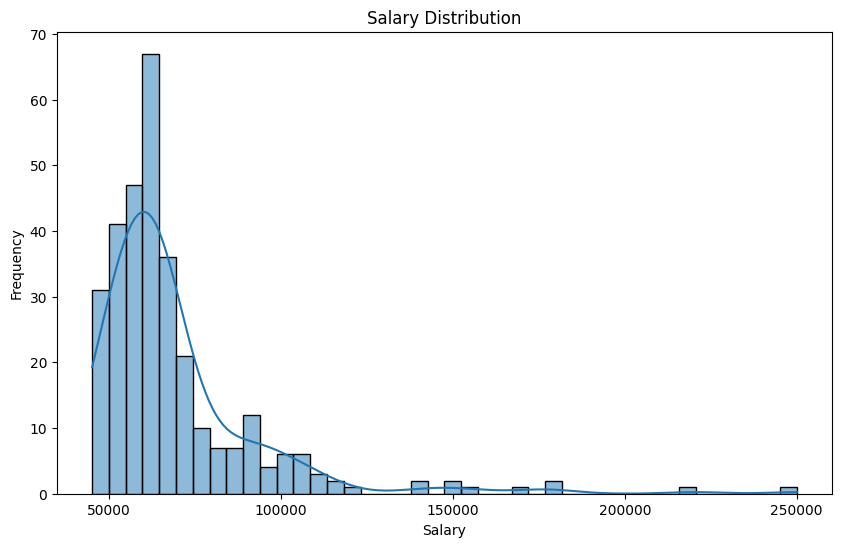

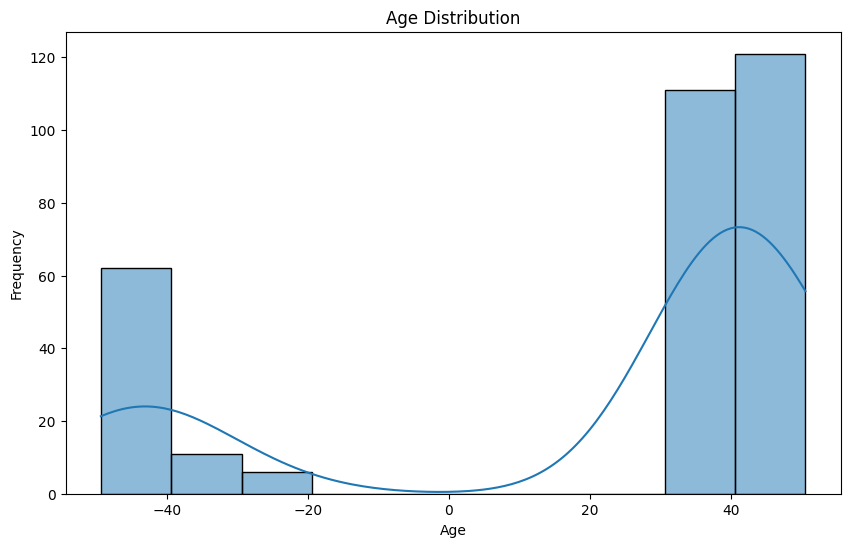

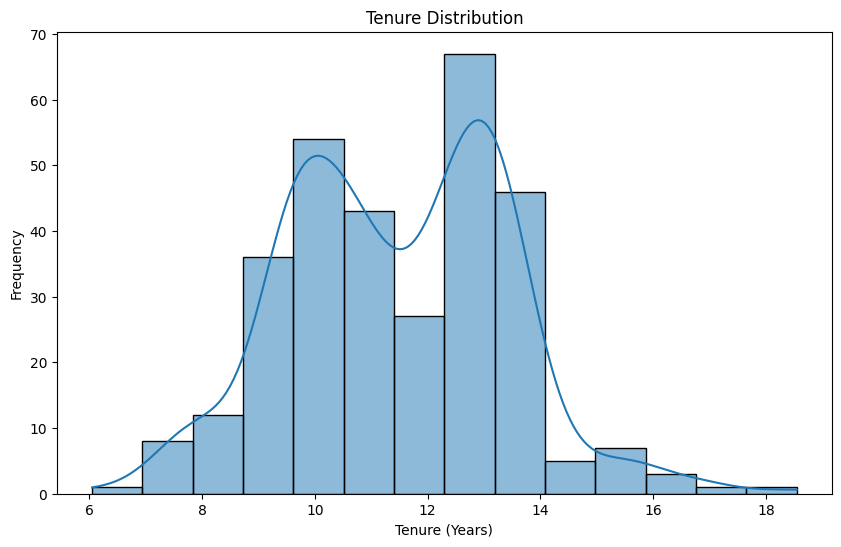

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Salary
plt.figure(figsize=(10, 6))
sns.histplot(hr_data['Salary'], kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(hr_data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Tenure
plt.figure(figsize=(10, 6))
sns.histplot(hr_data['Tenure'], kde=True)
plt.title('Tenure Distribution')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.show()


Analyze the distribution of categorical features to understand the composition of the data.

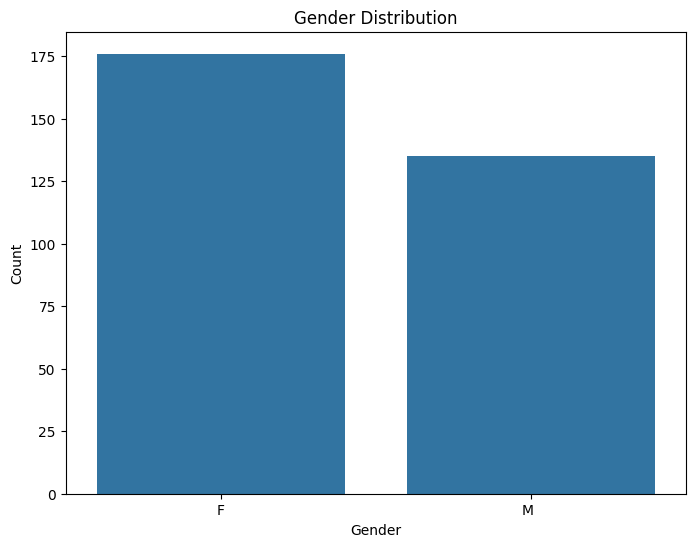

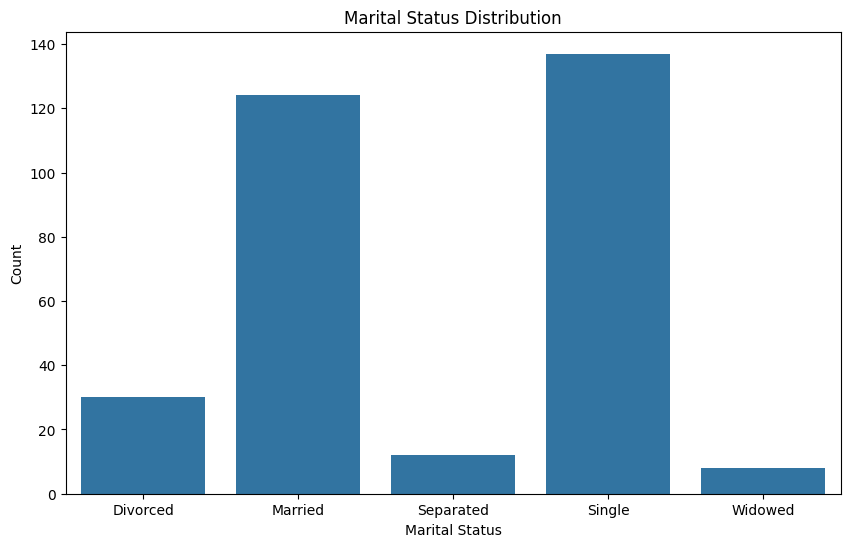

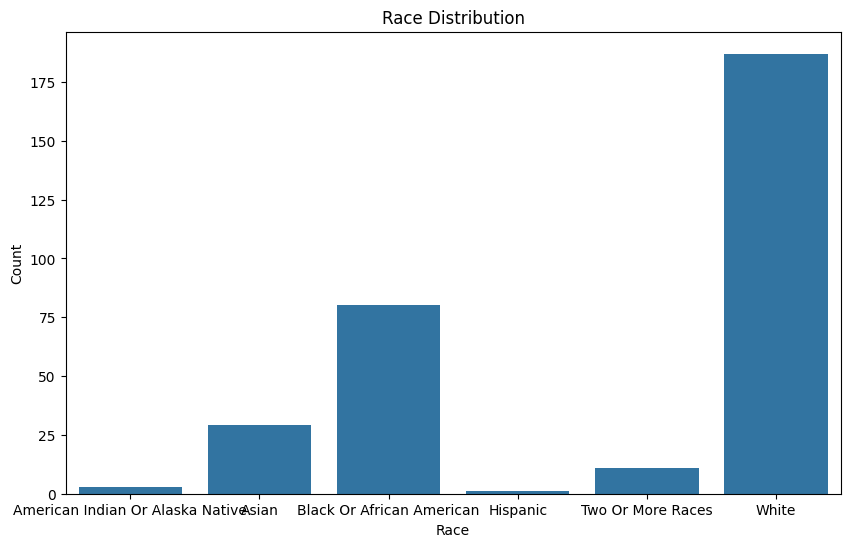

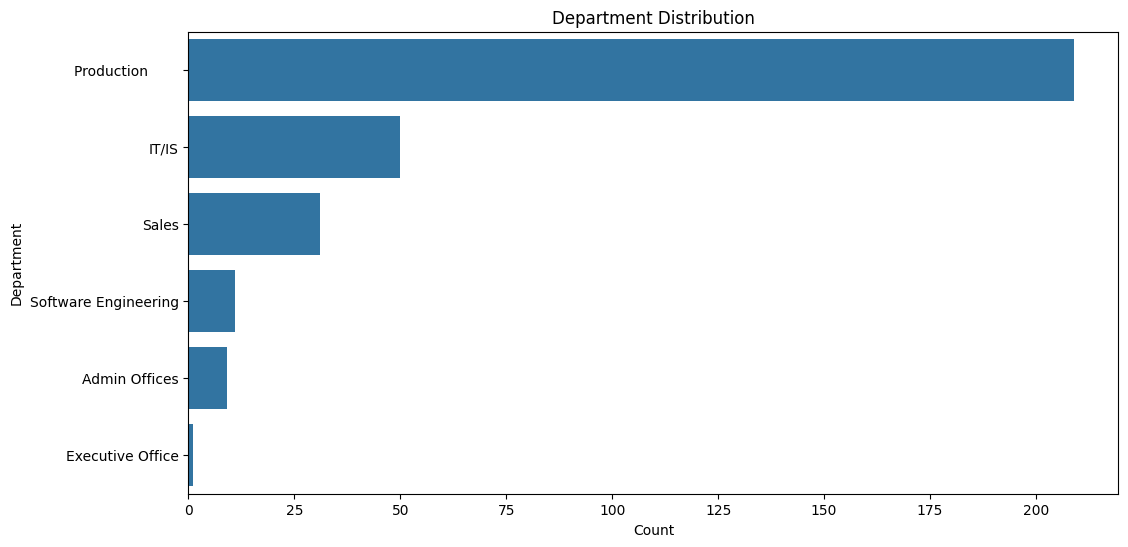

In [24]:
# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=hr_data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Marital Status distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalDesc', data=hr_data)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Race distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='RaceDesc', data=hr_data)
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

# Department distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='Department', data=hr_data, order=hr_data['Department'].value_counts().index)
plt.title('Department Distribution')
plt.xlabel('Count')
plt.ylabel('Department')
plt.show()


Analyze the distribution of categorical features to understand the composition of the data.

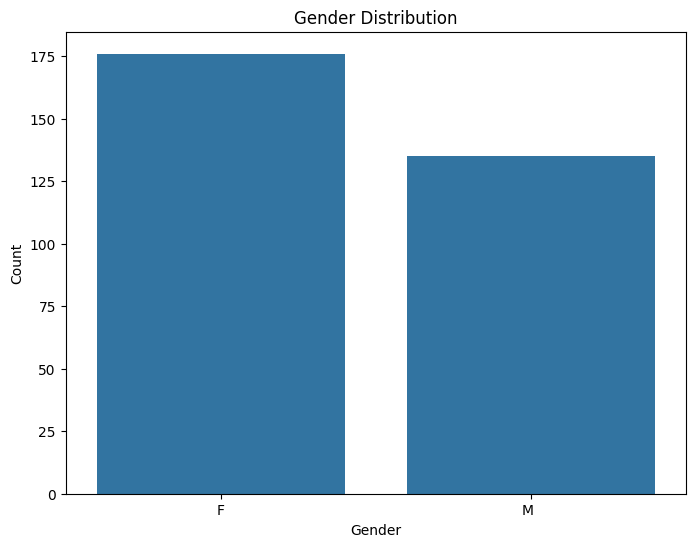

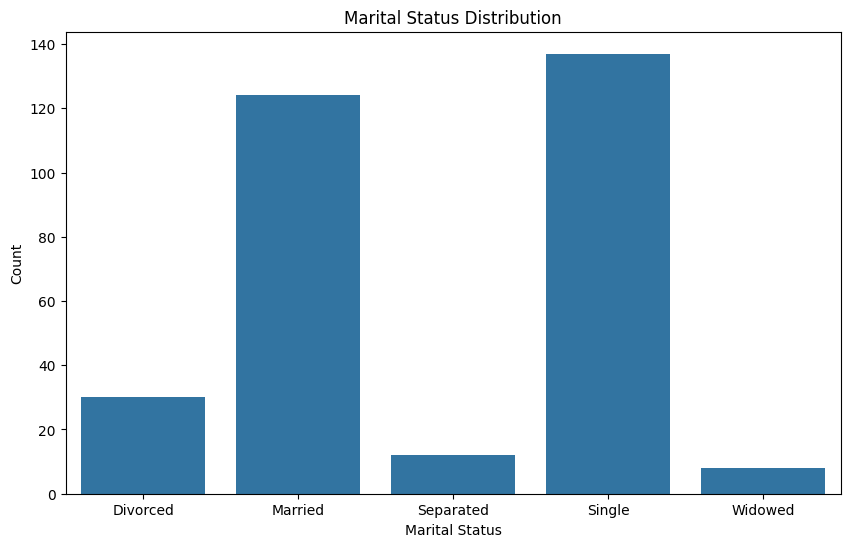

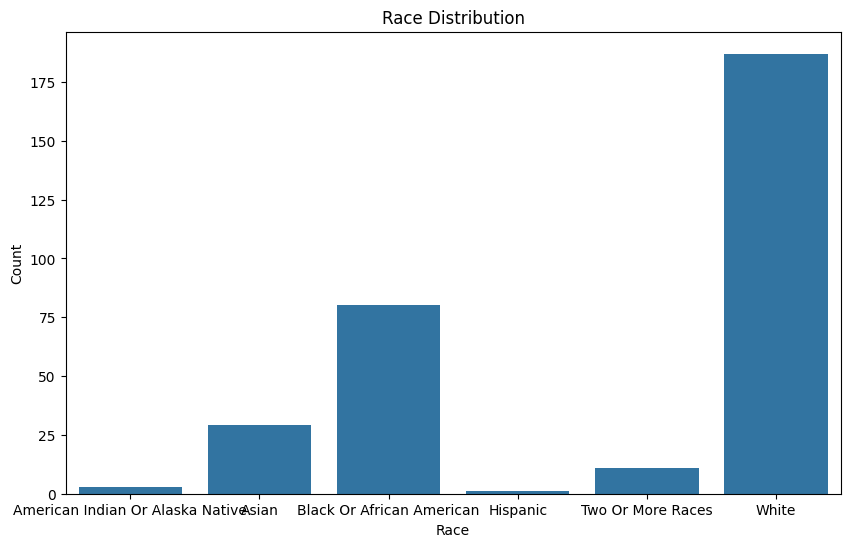

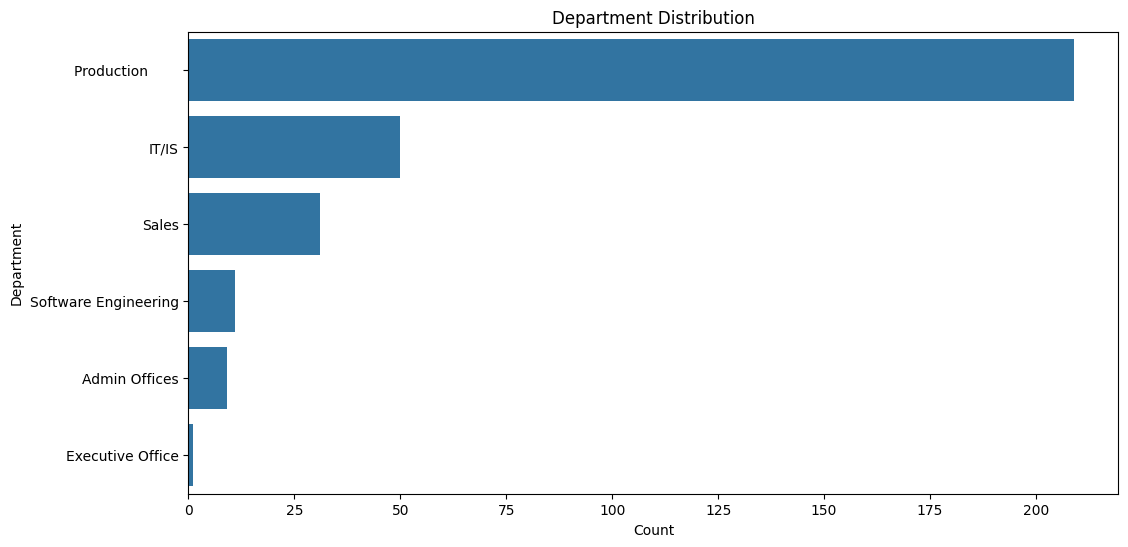

In [23]:
# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=hr_data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Marital Status distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalDesc', data=hr_data)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Race distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='RaceDesc', data=hr_data)
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

# Department distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='Department', data=hr_data, order=hr_data['Department'].value_counts().index)
plt.title('Department Distribution')
plt.xlabel('Count')
plt.ylabel('Department')
plt.show()


 Analyze the relationship between numerical and categorical features.

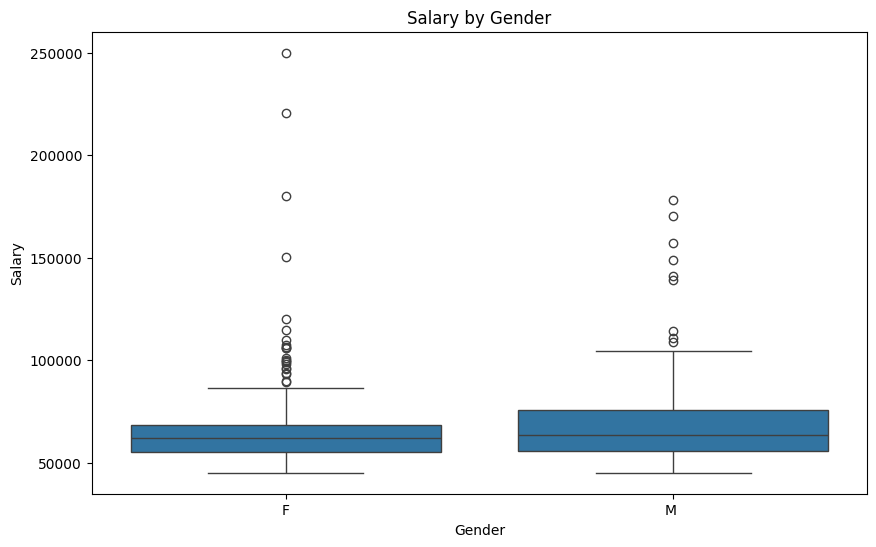

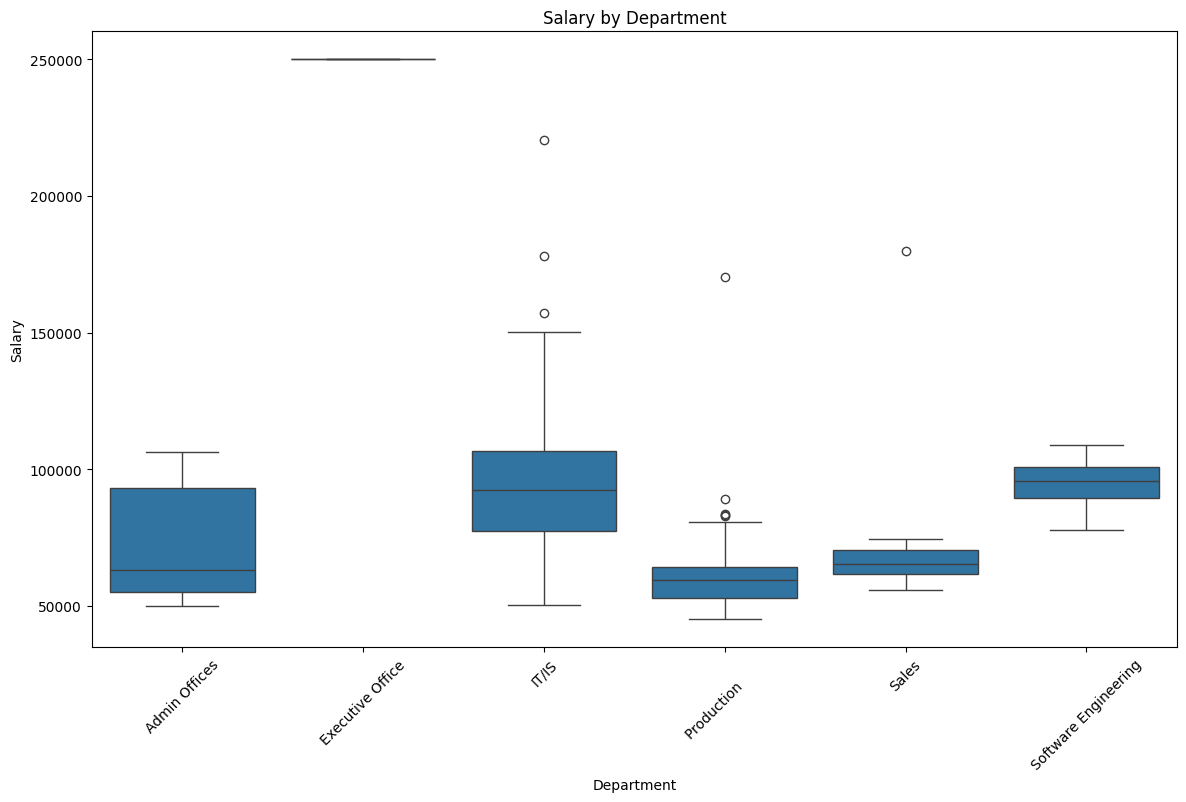

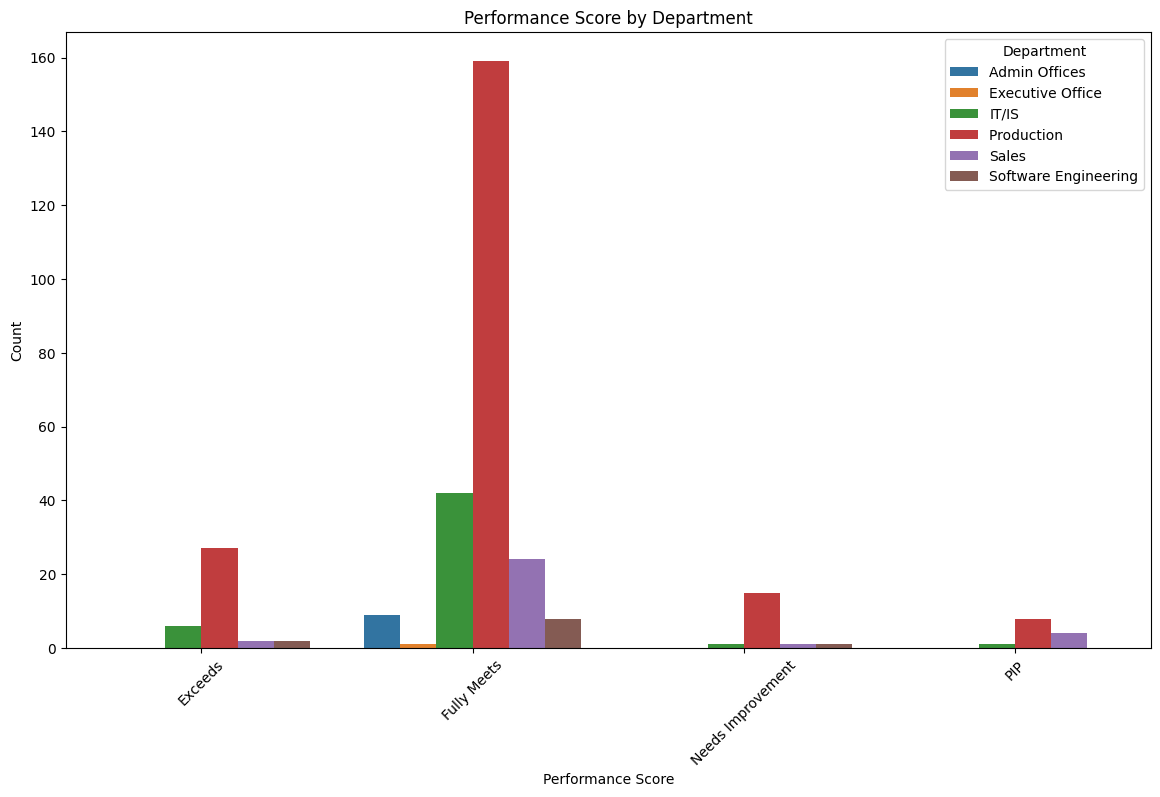

In [25]:
# Salary by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Salary', data=hr_data)
plt.title('Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

# Salary by Department
plt.figure(figsize=(14, 8))
sns.boxplot(x='Department', y='Salary', data=hr_data)
plt.title('Salary by Department')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

# Performance Score by Department
plt.figure(figsize=(14, 8))
sns.countplot(x='PerformanceScore', hue='Department', data=hr_data)
plt.title('Performance Score by Department')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Compute and visualize the correlation matrix to understand the relationships between numerical features.

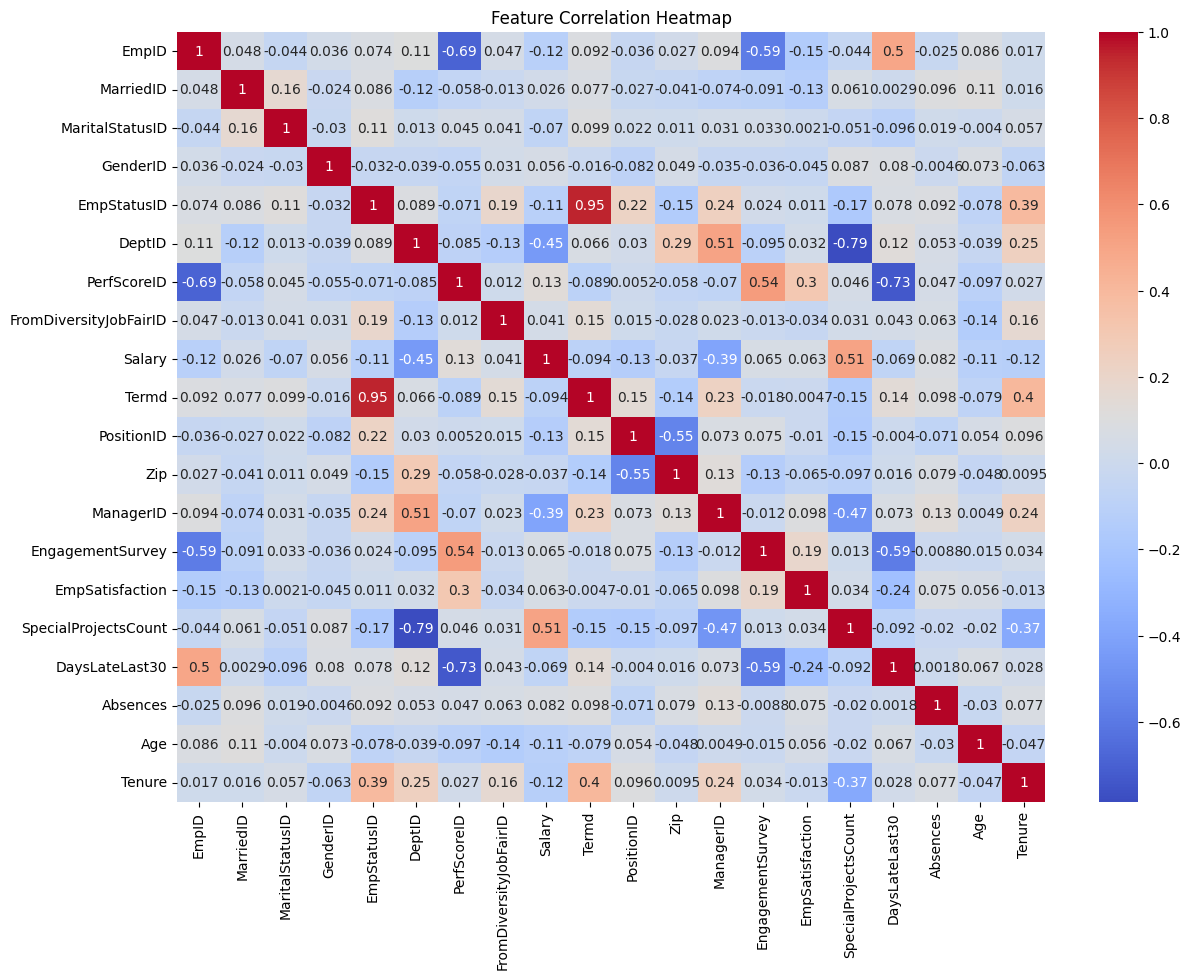

In [28]:
# Select only numeric columns
numeric_cols = hr_data.select_dtypes(include=['number']).columns

# Correlation matrix
correlation_matrix = hr_data[numeric_cols].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()